In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definir o caminho do arquivo
file_path = r'C:\Users\Jesuino\Downloads\teste-25\data\nafld1.csv'

# Carregar o conjunto de dados
df = pd.read_csv(file_path)

In [5]:
# Selecionar as colunas relevantes para X e y
X = df[['age', 'male', 'weight', 'height', 'bmi']]
y = df['status']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.impute import SimpleImputer

# Inicializar o imputer para preencher valores ausentes com a mediana das colunas
imputer = SimpleImputer(strategy='median')

# Ajustar o imputer nos dados de treino e transformá-los
X_train = imputer.fit_transform(X_train)

# Transformar os dados de teste
X_test = imputer.transform(X_test)

In [7]:
# Inicializar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier()

# Treinar o modelo nos dados de treino
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

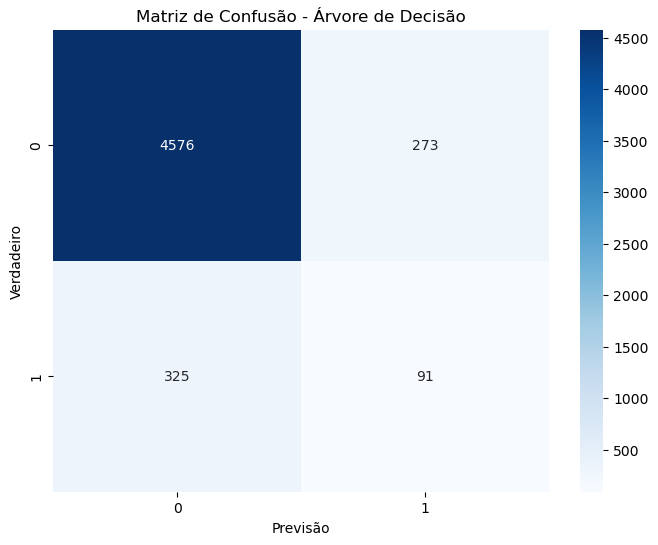

Acurácia (Árvore de Decisão): 0.8864197530864197
Precisão (Árvore de Decisão): 0.25
Recall (Árvore de Decisão): 0.21875
F1-score (Árvore de Decisão): 0.23333333333333334


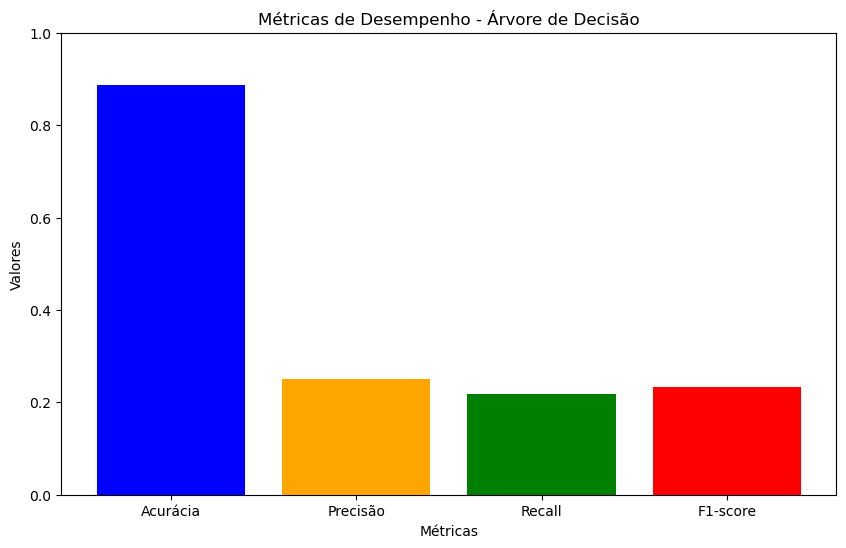

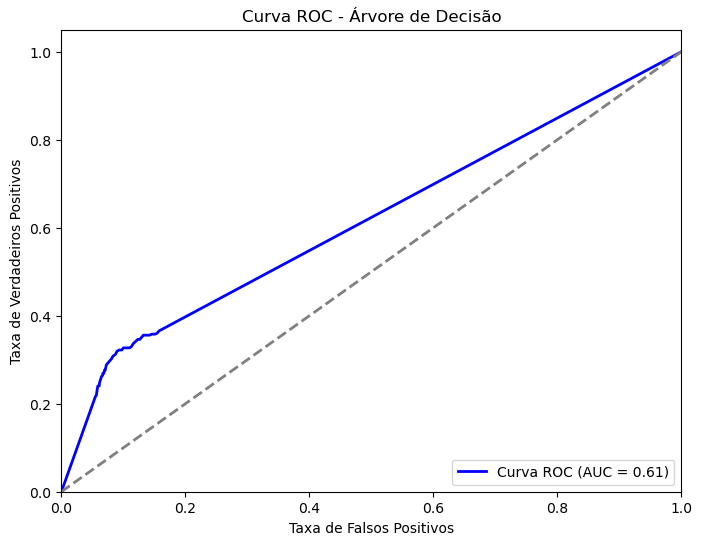

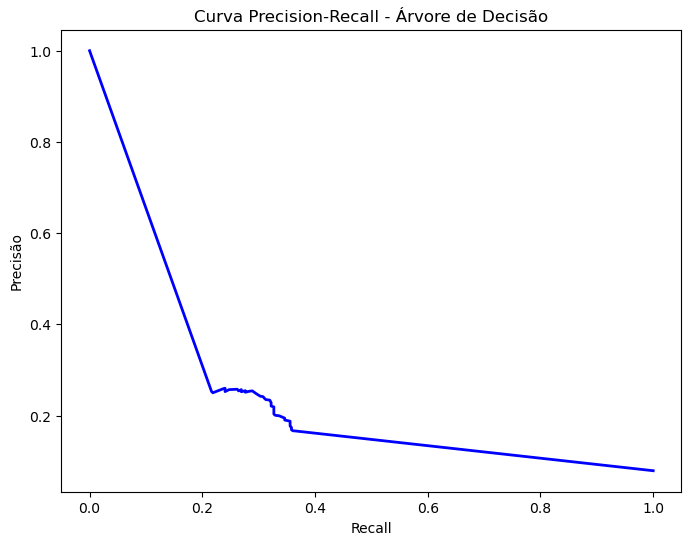

In [8]:
# Fazer previsões nos dados de teste
y_pred_dt = dt_model.predict(X_test)

# Calcular a Matriz de Confusão
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

# Calcular as Métricas de Desempenho
acurácia_dt = accuracy_score(y_test, y_pred_dt)
precisão_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Exibir Métricas de Desempenho
print(f"Acurácia (Árvore de Decisão): {acurácia_dt}")
print(f"Precisão (Árvore de Decisão): {precisão_dt}")
print(f"Recall (Árvore de Decisão): {recall_dt}")
print(f"F1-score (Árvore de Decisão): {f1_dt}")

# Gráfico de Barras para as Métricas de Desempenho
metrics_dt = {'Acurácia': acurácia_dt, 'Precisão': precisão_dt,
              'Recall': recall_dt, 'F1-score': f1_dt}
plt.figure(figsize=(10, 6))
plt.bar(metrics_dt.keys(), metrics_dt.values(),
        color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Métricas de Desempenho - Árvore de Decisão')
plt.ylim(0, 1)
plt.show()

# Curva ROC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2,
         label=f'Curva ROC (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precisions_dt, recalls_dt, _ = precision_recall_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(recalls_dt, precisions_dt, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall - Árvore de Decisão')
plt.show()